In [1]:
import torch
import gc
from dataloader import CustomImageDataset, DataLoader
from torchvision.transforms import Compose
import torchvision.transforms as transforms
from utils import transform


dataset = CustomImageDataset(annotations_dir = '../MNIST-ObjectDetection/data/mnist_detection/test/labels',
                             img_dir = '../MNIST-ObjectDetection/data/mnist_detection/test/images',
                             data_transform = transform,
                             size=(448,448))

train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

device = torch.device('cuda:0')

In [9]:
from model import YOLOv1, YOLOv1_resnet
import torchvision.transforms as T
from torch import nn
from torch import optim
import numpy as np
from utils import plot_images, clean_gpu, initialize_weights

# to plot the loss
loss_history = []

# clean gpu before wathever
clean_gpu()

# model
model = YOLOv1_resnet(S=7, depth=12).to(device)
#model.apply(initialize_weights)
model.train()

# optimizatino algorithm
mse = nn.MSELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.5)

In [21]:
def yolov1_loss_function(loss_metric, target, prediction):

    target_confidence_obj = target['one_obj'].to(device).squeeze()
    target_classification = target['class'].to(device).squeeze()

    predict_confidence_obj = prediction[...,0].squeeze()
    predict_classification = (prediction[...,1:12].squeeze())


    loss = loss_metric(
        torch.flatten(target_confidence_obj, start_dim=1), 
        torch.flatten(predict_confidence_obj*target_confidence_obj, start_dim=1)
    )


    loss += loss_metric(
        torch.flatten(target_confidence_obj*(1 - target_confidence_obj), start_dim=1),
            torch.flatten(predict_confidence_obj*(1 - target_confidence_obj), start_dim=1)
    )
    
    # classification loss
    loss += loss_metric(
        torch.flatten(target_classification, start_dim=1), 
        torch.flatten(predict_classification, start_dim=1)
    )

    return loss

-------------------Training:0/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.41it/s]


Loss at 0/300 is: 810.8056089541786
-------------------Testing-------------------------------
Loss during test:392.0531005859375


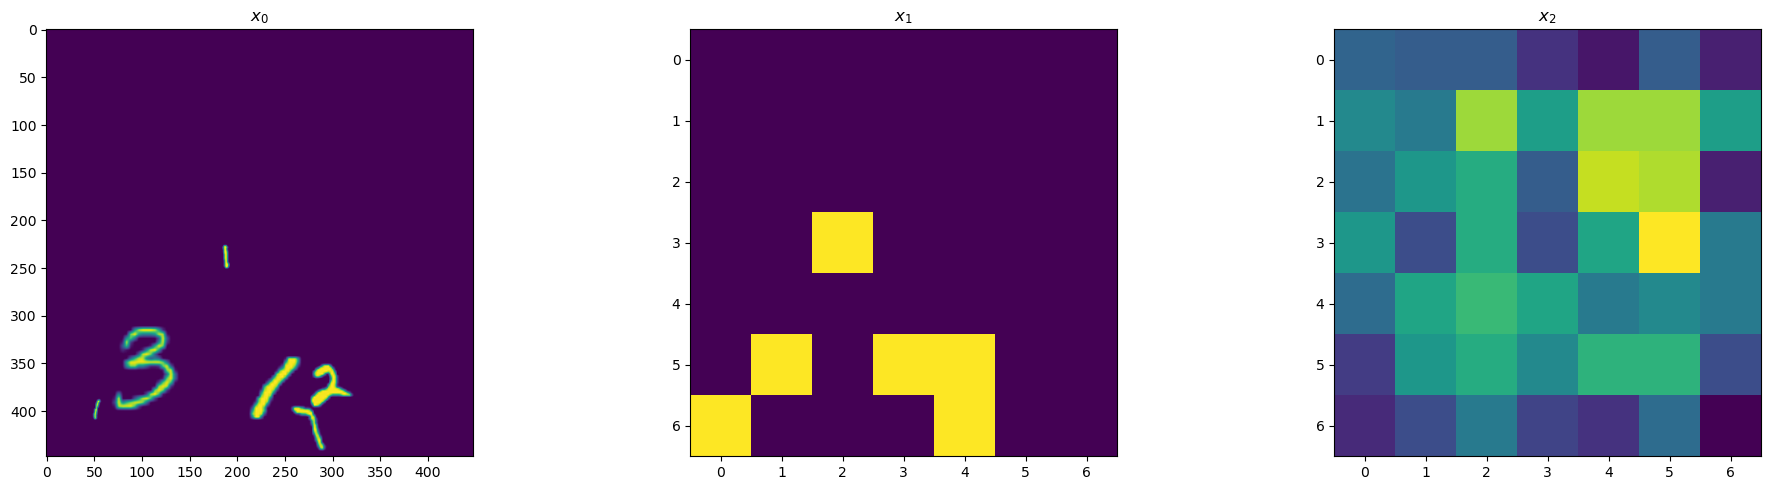

-------------------Training:1/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.17it/s]


Loss at 1/300 is: 783.5202212997391
-------------------Testing-------------------------------
Loss during test:347.8002624511719


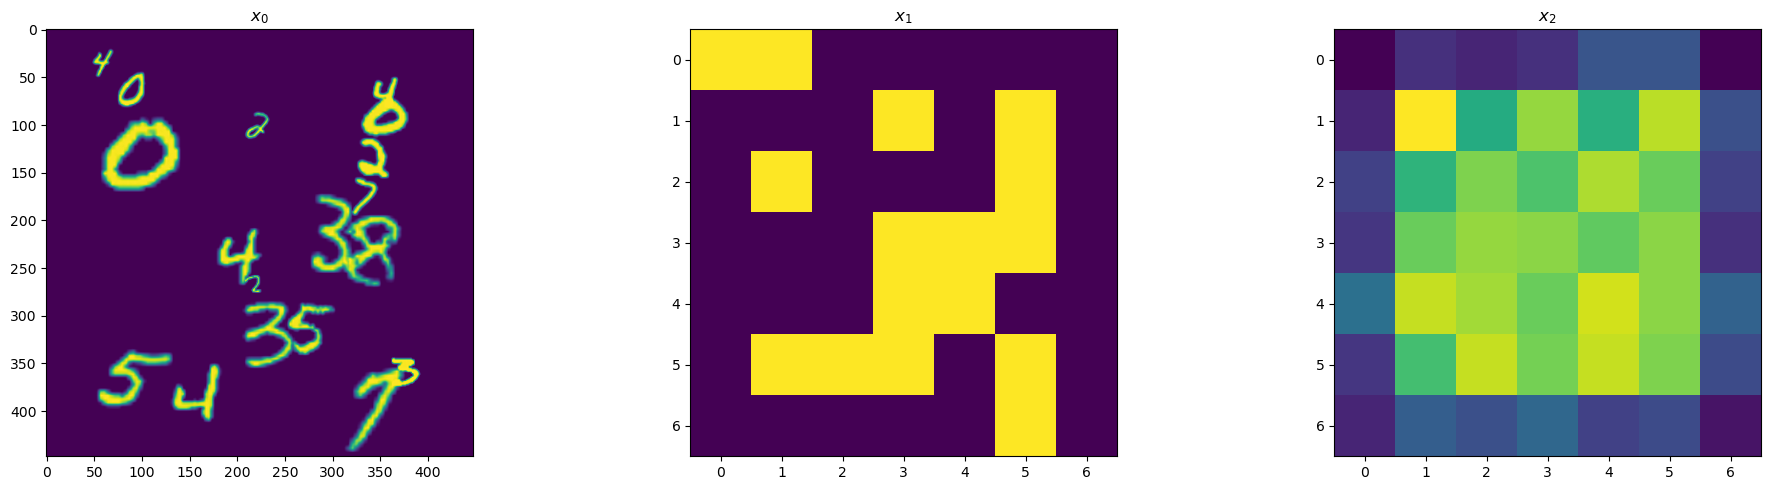

-------------------Training:2/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.95it/s]


Loss at 2/300 is: 759.3125130181862
-------------------Testing-------------------------------
Loss during test:419.8944091796875


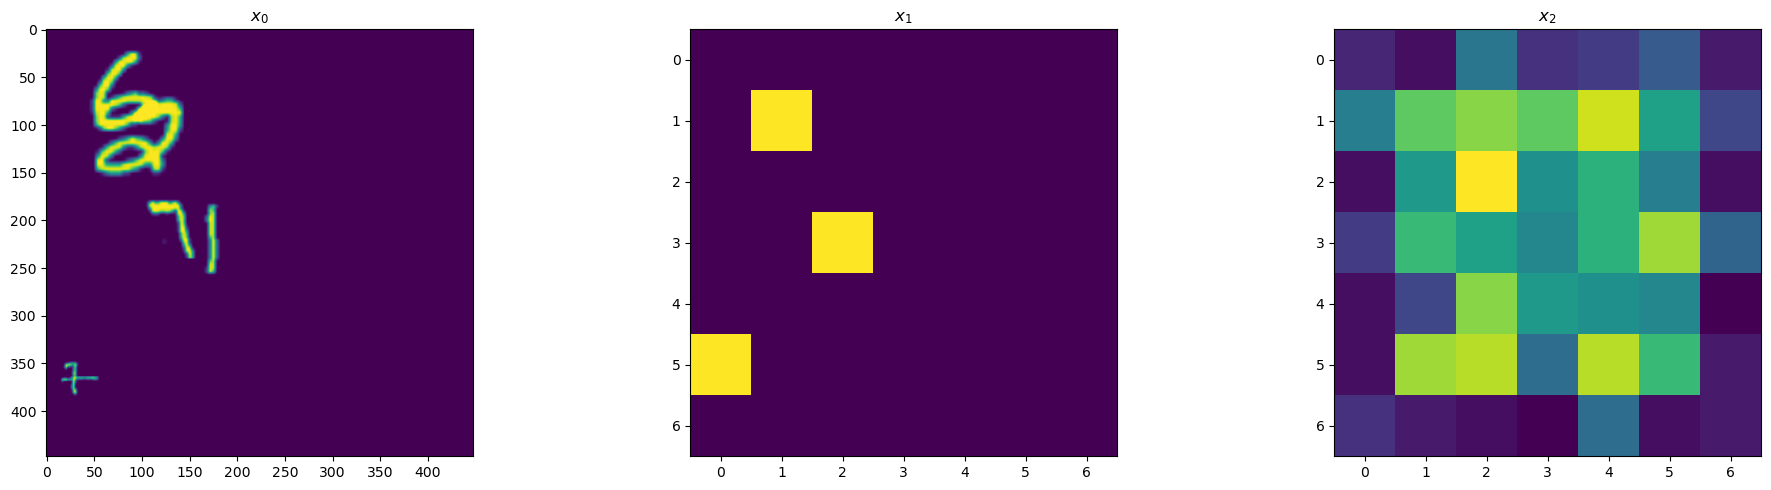

-------------------Training:3/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.11it/s]


Loss at 3/300 is: 737.741149232511
-------------------Testing-------------------------------
Loss during test:340.29095458984375


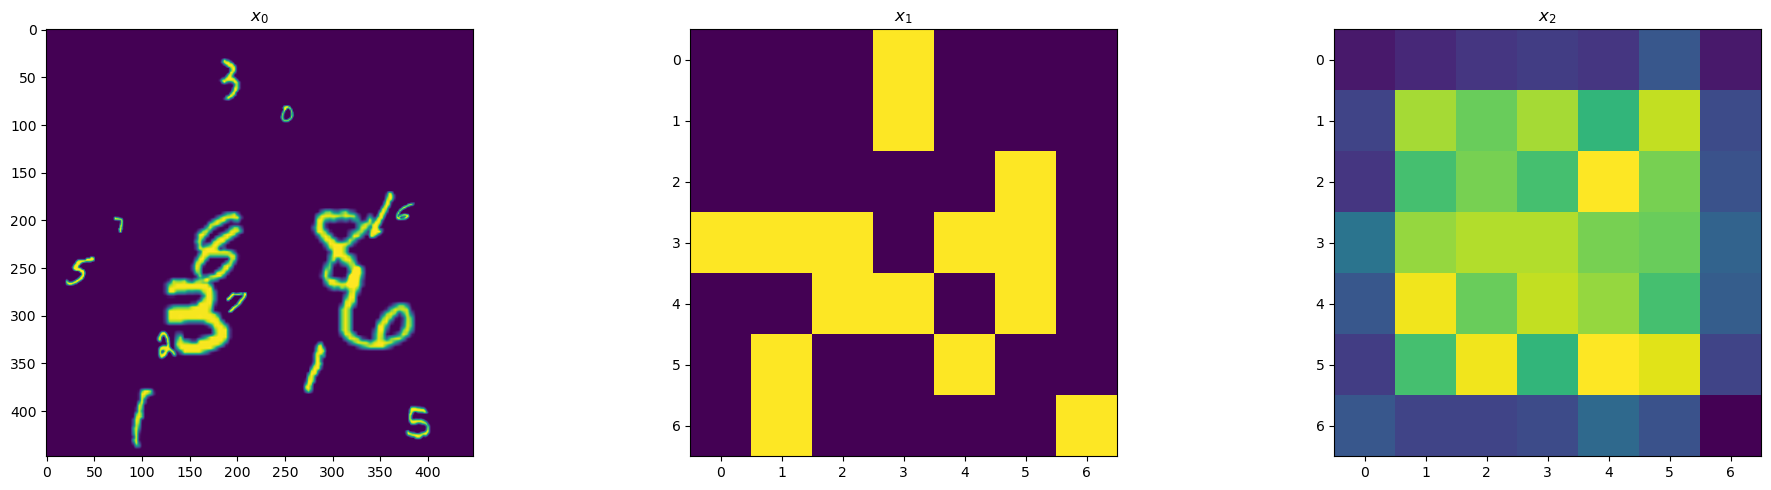

-------------------Training:4/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.11it/s]


Loss at 4/300 is: 718.3674917871663
-------------------Testing-------------------------------
Loss during test:435.70751953125


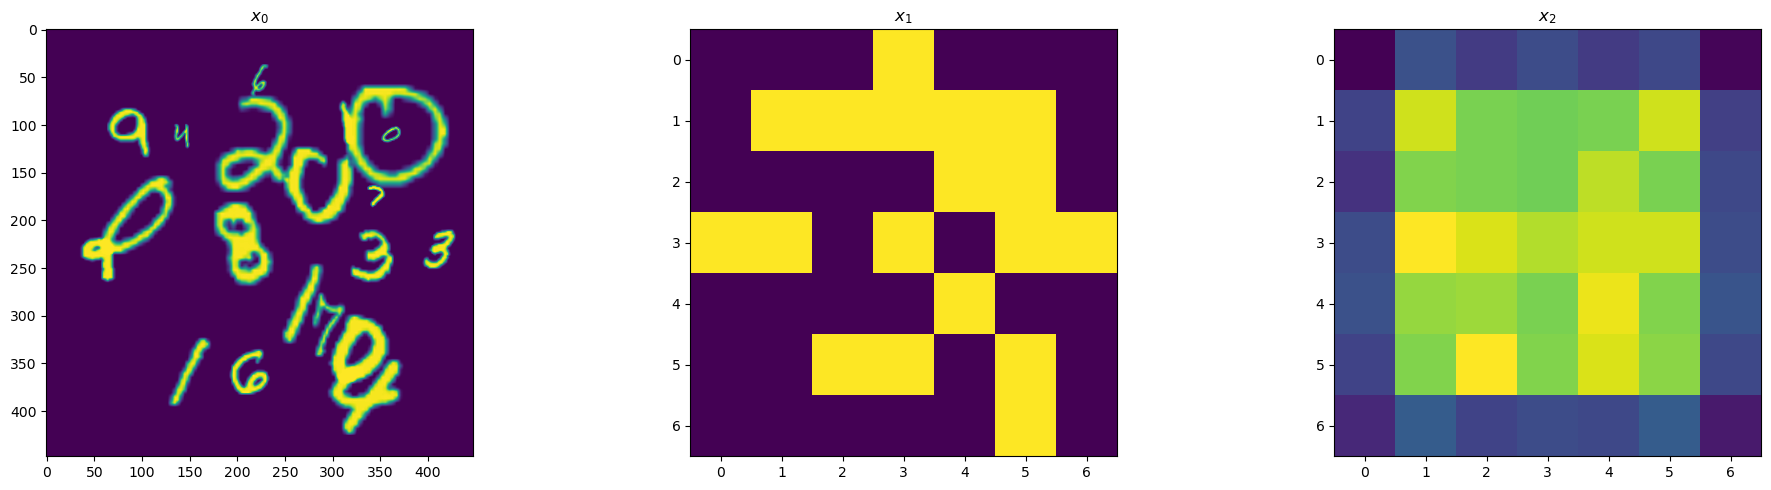

-------------------Training:5/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.86it/s]


Loss at 5/300 is: 700.9259889384032
-------------------Testing-------------------------------
Loss during test:350.67706298828125


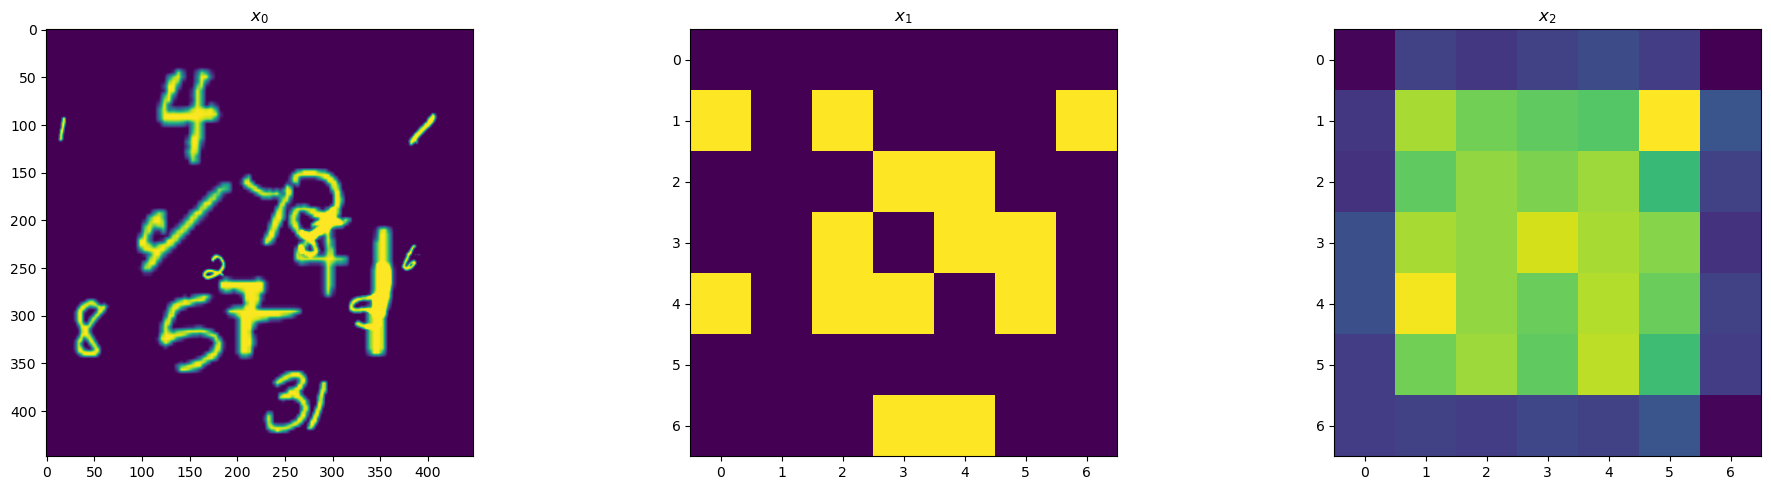

-------------------Training:6/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.03it/s]


Loss at 6/300 is: 685.0984487878271
-------------------Testing-------------------------------
Loss during test:369.2538146972656


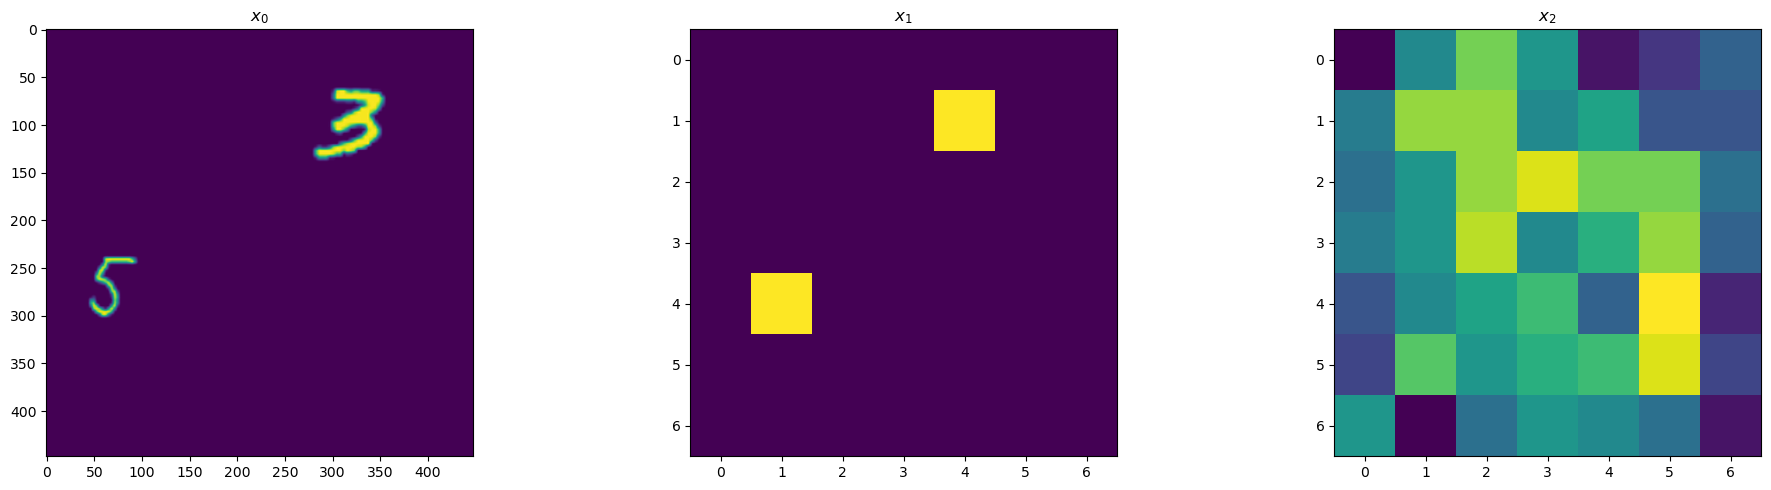

-------------------Training:7/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.07it/s]


Loss at 7/300 is: 670.7029451854276
-------------------Testing-------------------------------
Loss during test:357.0713195800781


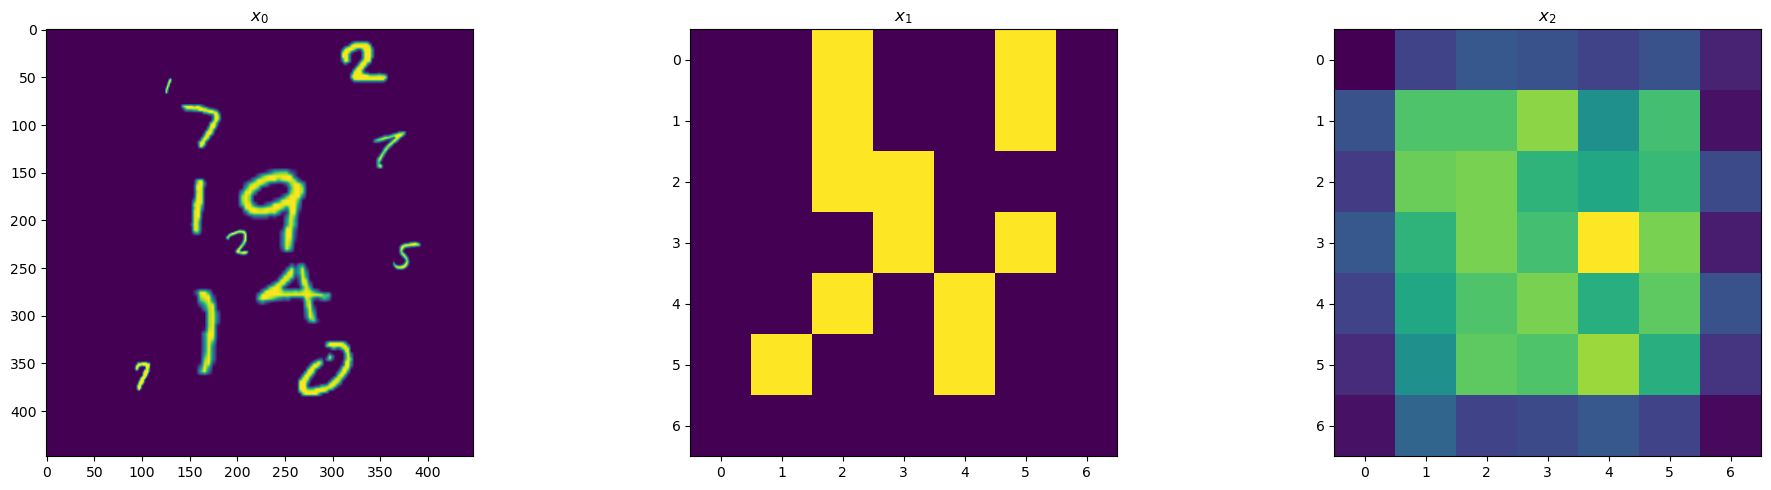

-------------------Training:8/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.73it/s]


Loss at 8/300 is: 657.561608882521
-------------------Testing-------------------------------
Loss during test:317.38665771484375


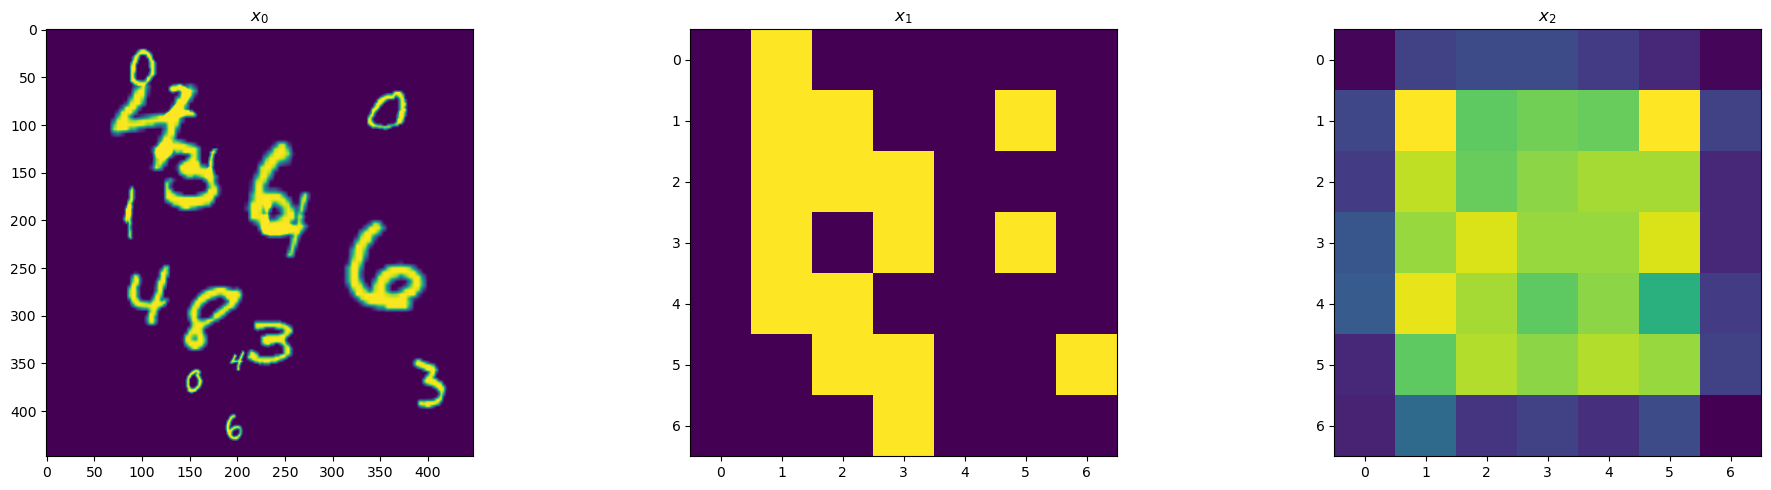

-------------------Training:9/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.88it/s]


Loss at 9/300 is: 645.4929267314994
-------------------Testing-------------------------------
Loss during test:415.58233642578125


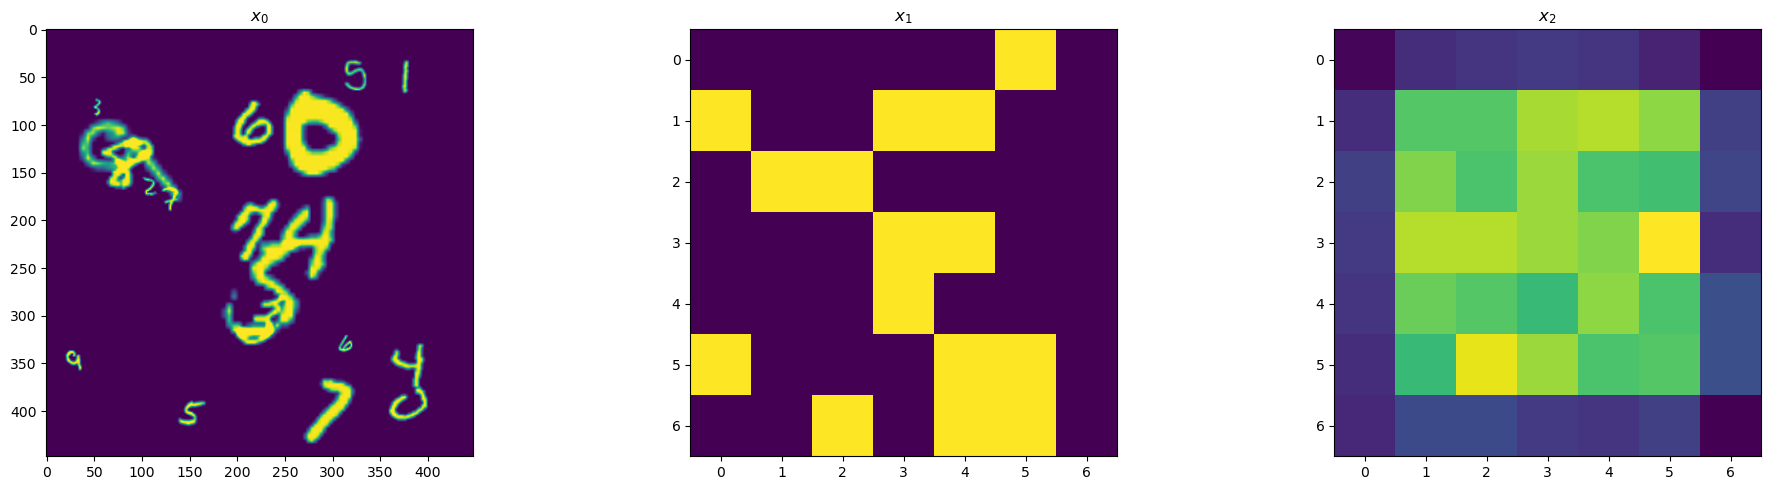

-------------------Training:10/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.04it/s]


Loss at 10/300 is: 634.3685904394222
-------------------Testing-------------------------------
Loss during test:324.8190002441406


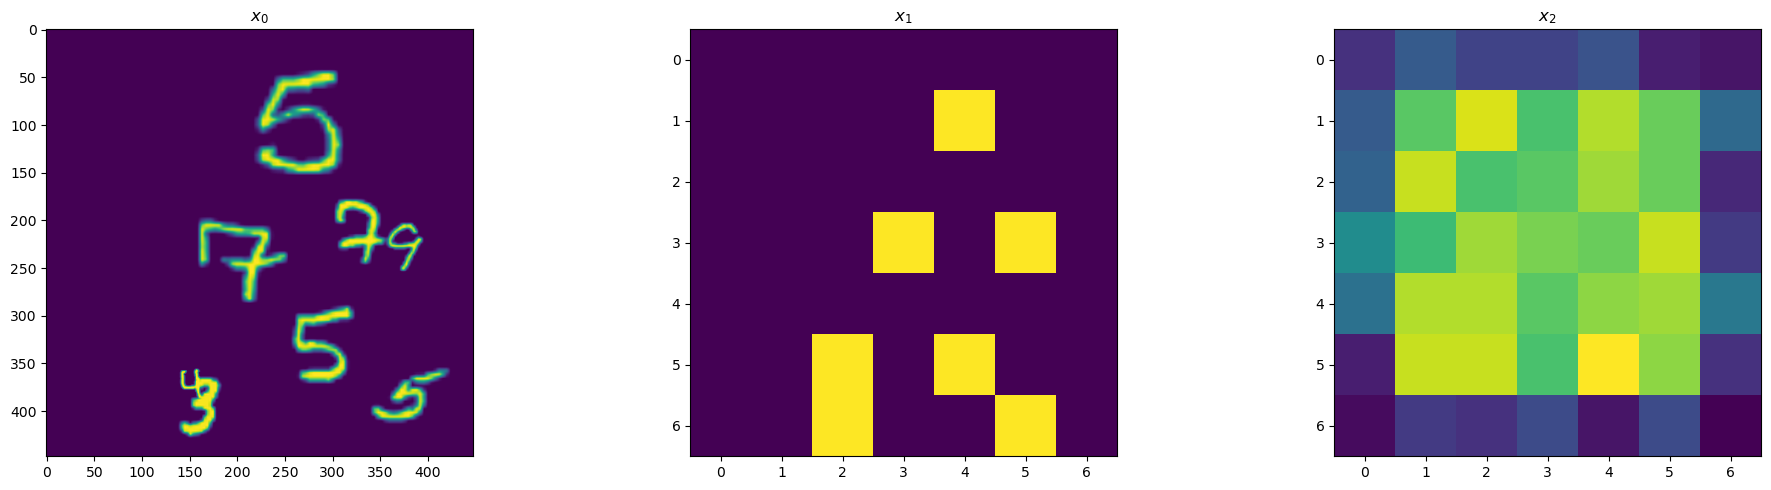

-------------------Training:11/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.02it/s]


Loss at 11/300 is: 624.0950098763278
-------------------Testing-------------------------------
Loss during test:329.29791259765625


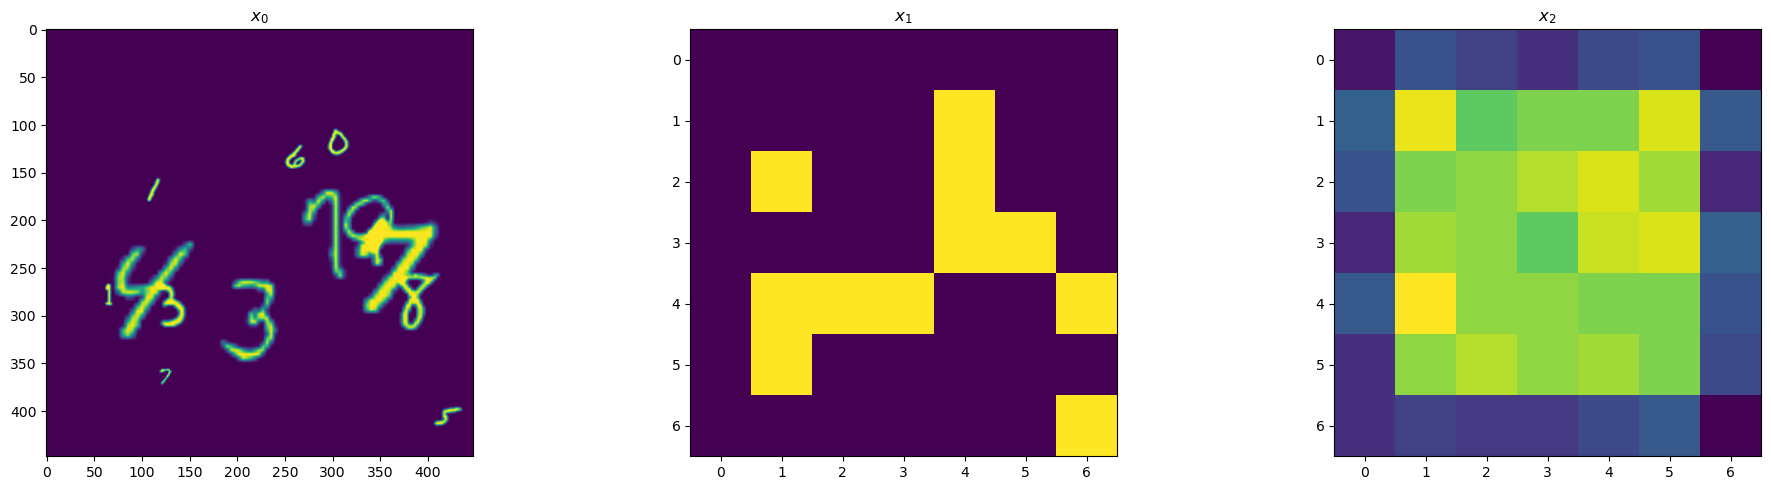

-------------------Training:12/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.10it/s]


Loss at 12/300 is: 614.575875867014
-------------------Testing-------------------------------
Loss during test:368.2169189453125


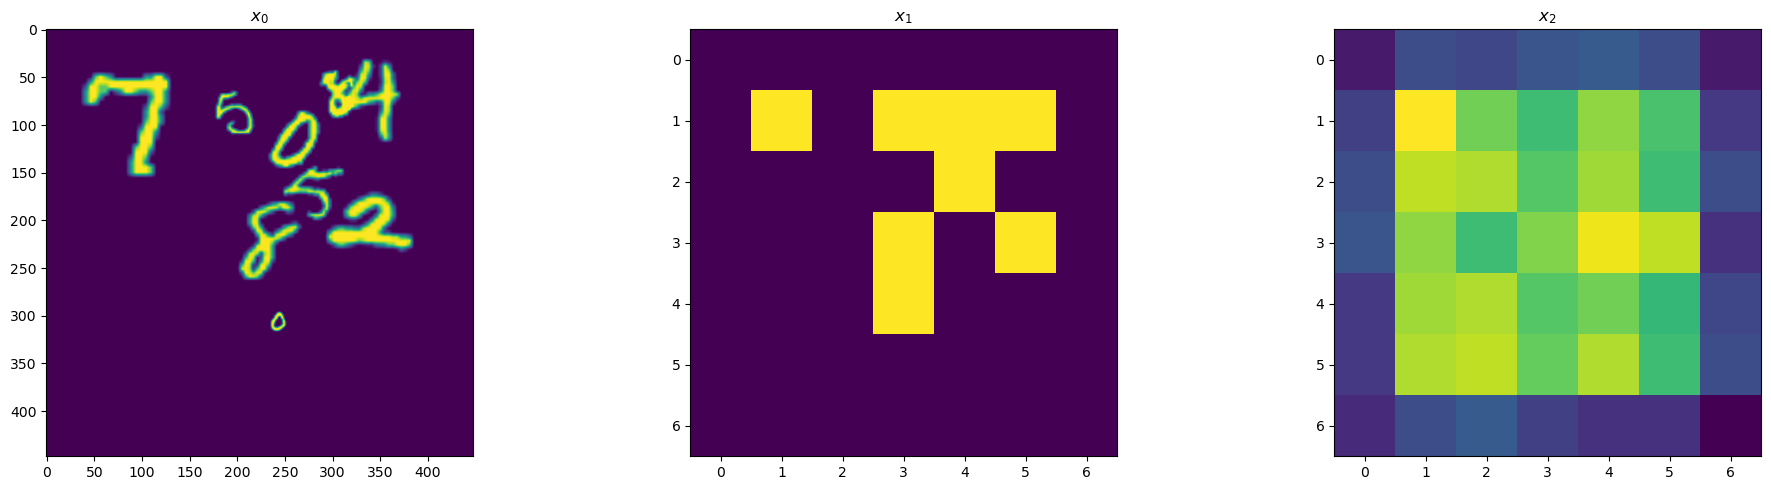

-------------------Training:13/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.34it/s]


Loss at 13/300 is: 605.7240982271305
-------------------Testing-------------------------------
Loss during test:270.71038818359375


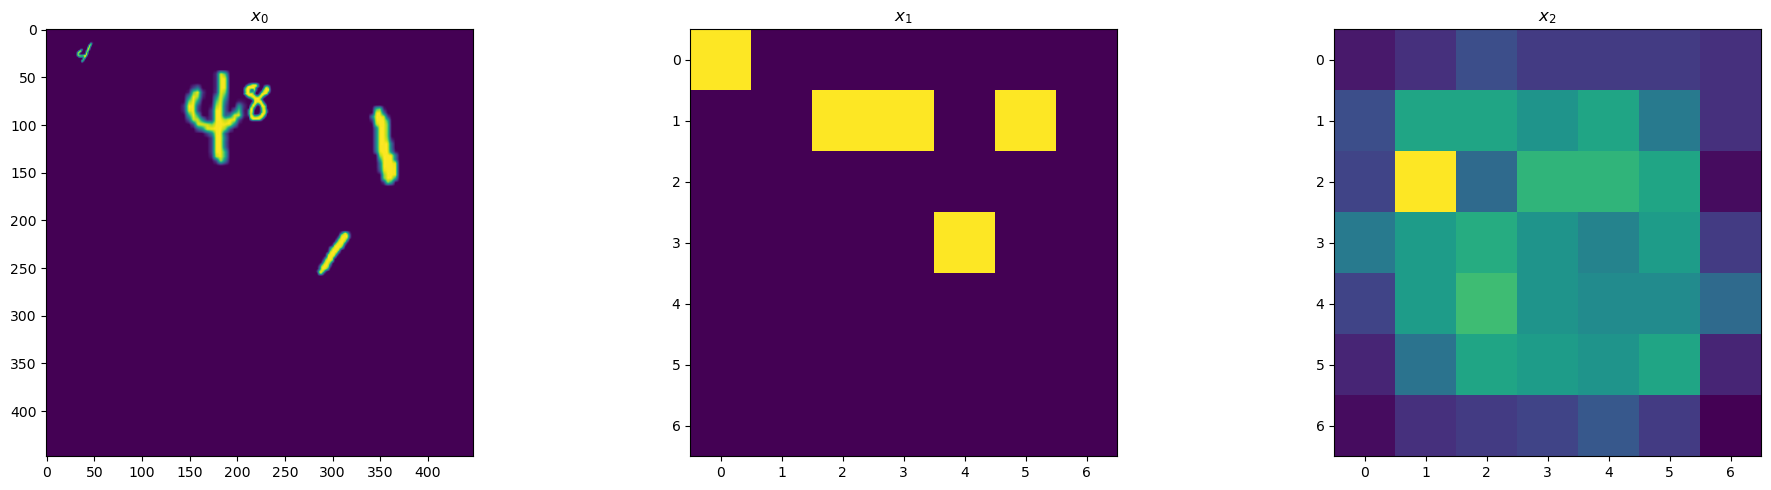

-------------------Training:14/300-------------------------------


100%|██████████| 63/63 [00:08<00:00,  7.23it/s]


Loss at 14/300 is: 597.4751264413892
-------------------Testing-------------------------------
Loss during test:345.46356201171875


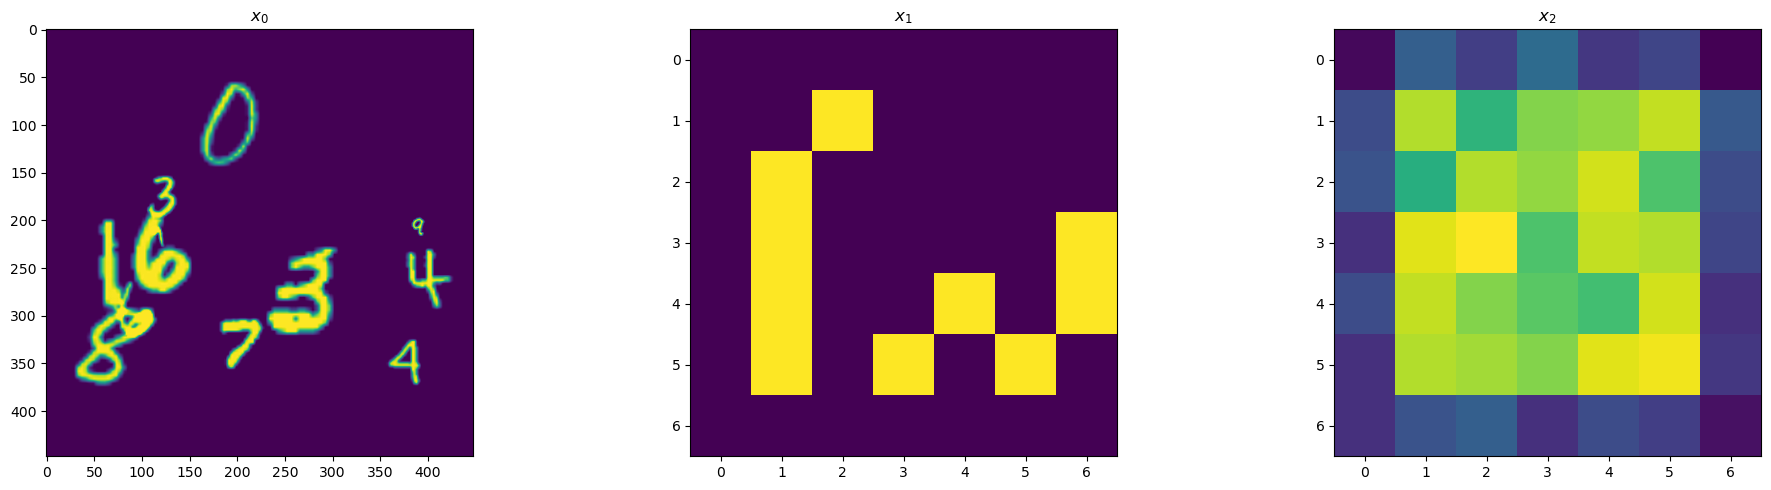

-------------------Training:15/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.86it/s]


Loss at 15/300 is: 589.7748177158487
-------------------Testing-------------------------------
Loss during test:366.92340087890625


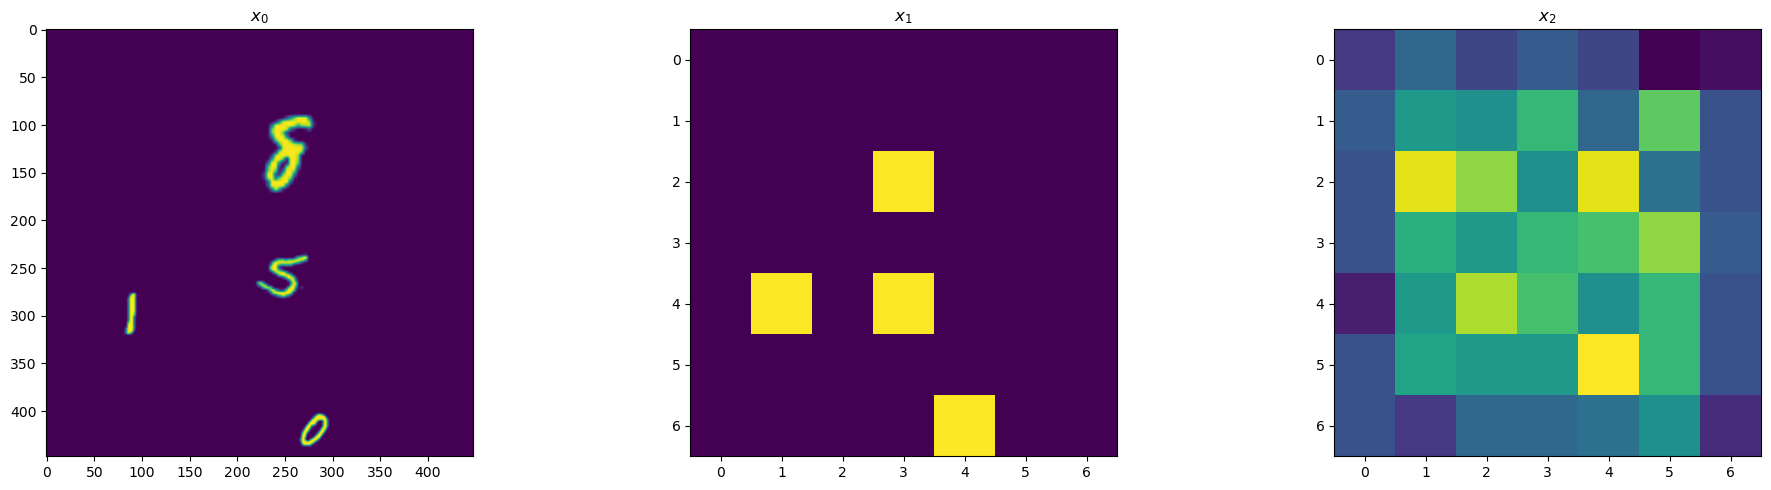

-------------------Training:16/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.89it/s]


Loss at 16/300 is: 582.5648559476796
-------------------Testing-------------------------------
Loss during test:399.1031494140625


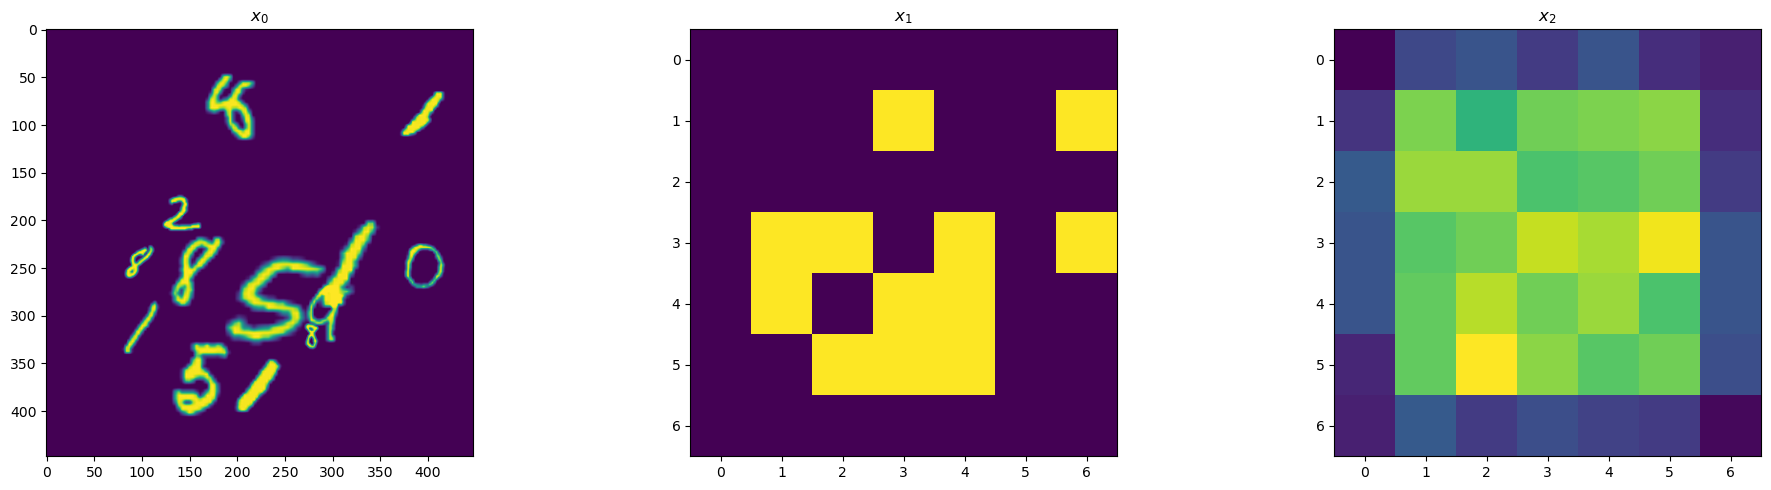

-------------------Training:17/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.56it/s]


Loss at 17/300 is: 575.7978738806497
-------------------Testing-------------------------------
Loss during test:378.4165344238281


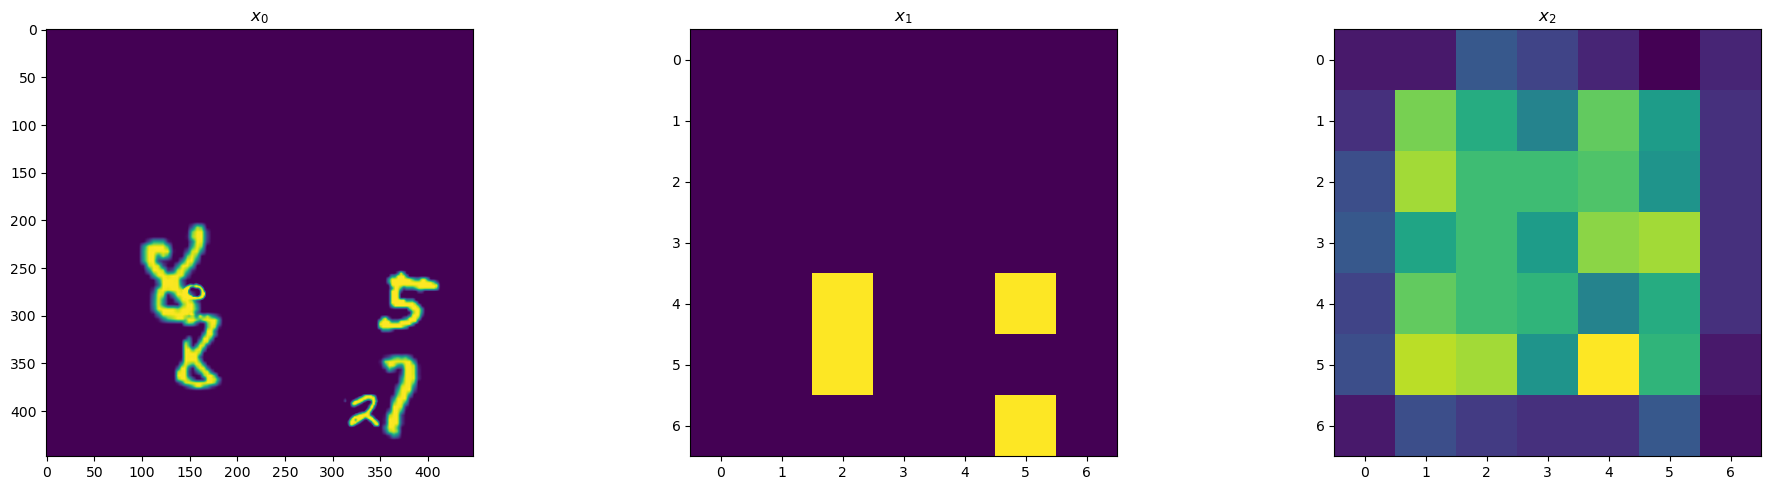

-------------------Training:18/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.53it/s]


Loss at 18/300 is: 569.429713785534
-------------------Testing-------------------------------
Loss during test:386.13104248046875


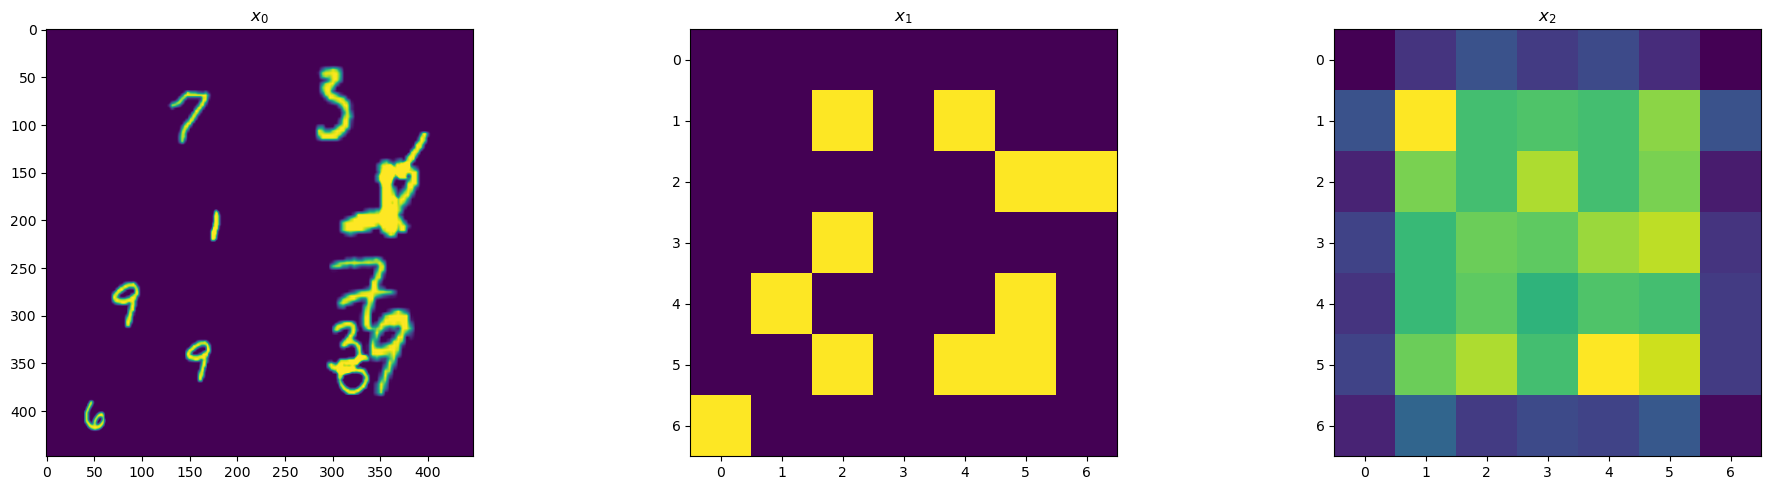

-------------------Training:19/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.37it/s]


Loss at 19/300 is: 563.4377254775695
-------------------Testing-------------------------------
Loss during test:328.74755859375


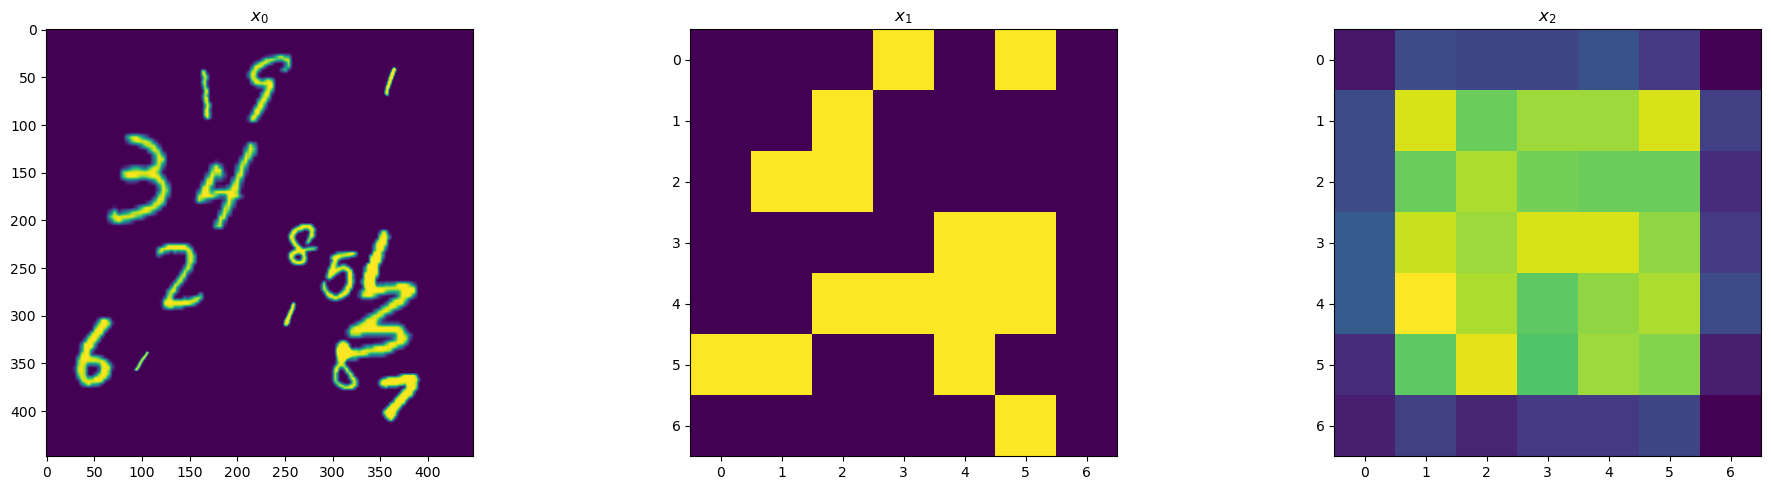

-------------------Training:20/300-------------------------------


100%|██████████| 63/63 [00:09<00:00,  6.53it/s]


Loss at 20/300 is: 557.7792642791886
-------------------Testing-------------------------------
Loss during test:379.8490905761719


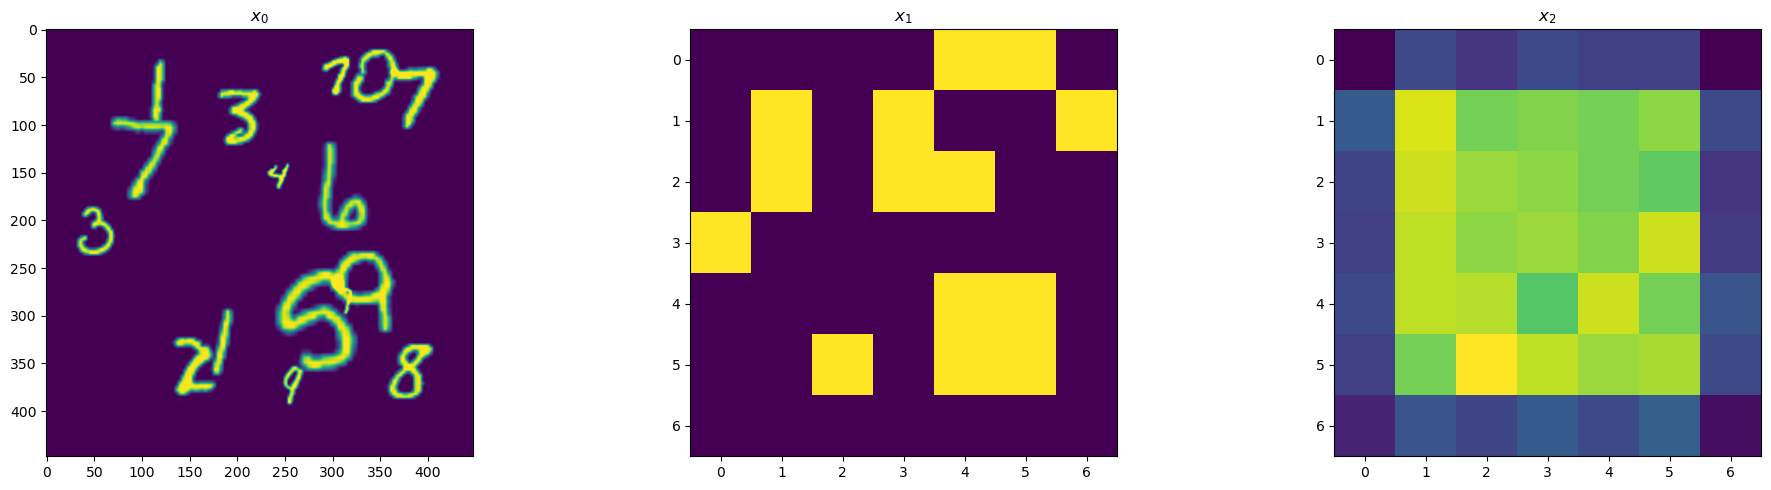

-------------------Training:21/300-------------------------------


100%|██████████| 63/63 [00:10<00:00,  6.04it/s]


Loss at 21/300 is: 552.4268513858659
-------------------Testing-------------------------------
Loss during test:365.3497314453125


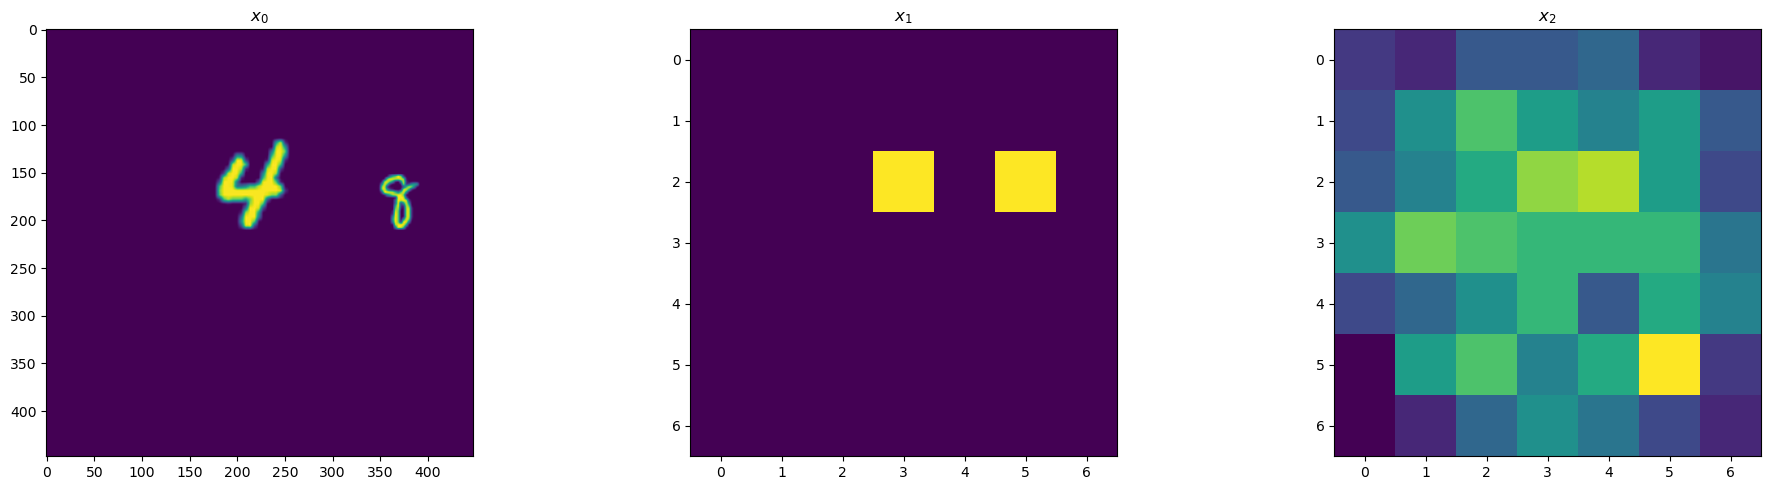

-------------------Training:22/300-------------------------------


 19%|█▉        | 12/63 [00:01<00:08,  6.08it/s]


KeyboardInterrupt: 

In [22]:
from model import YOLOv1, YOLOv1_resnet
import torchvision.transforms as T
from torch import nn
from torch import optim
import numpy as np
from utils import plot_images, clean_gpu
from tqdm import tqdm

clean_gpu()
torch.manual_seed(0)
#training loop
EPOCHS = 300
for epoch in range(EPOCHS):

    print(f'-------------------Training:{epoch}/{EPOCHS}-------------------------------')

    n_break = 0
    model.train()
    for idx, data in enumerate(tqdm(train_loader)):
    
        # zero the parameters
        optimizer.zero_grad()
        
        # forward
        img, target = data
        img = img.to(device)
        prediction = model(img)

        # loss evaluation
        loss = yolov1_loss_function(mse, target, prediction)

        #print(loss)
        loss.backward()
        optimizer.step()
        #print(loss)

        loss_history.append(loss.detach().item())

    print(f'Loss at {epoch}/{EPOCHS} is: {np.average(np.array(loss_history))}')

    print("-------------------Testing-------------------------------")
    model.eval()
    for idx, data in enumerate(train_loader):

                # zero the parameters
        optimizer.zero_grad()
        
        # forward
        img, target = data
        img = img.to(device)
        prediction = model(img)

        loss = yolov1_loss_function(mse, target, prediction)

        print(f"Loss during test:{loss.detach().item()}")

        img2show = img.detach()[0,...].cpu()
        target2show = target['one_obj'].squeeze().detach()[0,...].cpu()
        predict2show = prediction[...,0].squeeze().detach()[0,...].cpu()
        
        plot_images([img2show, target2show, predict2show], title='awd')

        if idx == n_break:
            break
        

In [ ]:
print("-------------------Testing-------------------------------")
n_break = 0
model.eval()
for idx, data in enumerate(train_loader):

    # get the inputs
    img, target = data
    img, target = img.to(device), target['one_obj'].to(device)

    # forward
    prediction = model(img)
    target_confidence_obj = target.squeeze()
    predict_confidence_obj = prediction.squeeze()


    # backward + optimize
    loss = mse(
        torch.flatten(target_confidence_obj, start_dim=1), 
        torch.flatten(predict_confidence_obj*target_confidence_obj, start_dim=1)
    ) 
    
    loss += 0.5*mse(
        torch.flatten(target_confidence_obj*(1 - target_confidence_obj), start_dim=1),
            torch.flatten(predict_confidence_obj*(1 - target_confidence_obj), start_dim=1)
    )

    print(f"Loss during test:{loss.detach().item()}")

    img2show = img.detach()[0,...].cpu()
    target2show = target_confidence_obj.detach()[0,...].cpu()
    predict2show = predict_confidence_obj.detach()[0,...].cpu()
    
    plot_images([img2show, target2show, predict2show], title='awd')

    if idx == n_break:
        break
    


NameError: name 'model' is not defined